# Crop Yield Prediction using LSTM

This notebook demonstrates how to build an LSTM model to predict crop yields using a dataset from Kaggle. We'll go through the following steps:
1. Setting up the environment
2. Loading the dataset
3. Preprocessing the data
4. Splitting the data
5. Building the LSTM model
6. Training the model
7. Evaluating the model
8. Making predictions
9. Visualizing the results

### Developed By:
- **Daqch Rima**
- **Hiba Echchaiaa**
- **Salma Motia**
- **Zineb Alami Arroussi**


## Step 1: Set Up Your Environment

We need to install the necessary libraries to build our LSTM model. Run the following commands to install TensorFlow, Keras, Pandas, and Matplotlib:


In [1]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install matplotlib


Dataset is /content/drive/MyDrive/crop_yield.csv


## Step 2: Load the Dataset

Download the dataset from Kaggle and upload it to your Colab notebook. Load the dataset using Pandas:


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')


## Step 3: Preprocess the Data

Handle missing values and encode categorical variables:


In [3]:
df = df.dropna()


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Crop', 'Season', 'State'], dtype='object')


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Scale the encoded data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)


## Step 4: Split the Data

Split the data into training and testing sets:


In [6]:
from sklearn.model_selection import train_test_split

X = df_scaled[:, :-1]  # Features
y = df_scaled[:, -1]   # Target variable (crop yield)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Build the LSTM Model

Create the LSTM model:


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## Step 6: Train the Model

Reshape the data and fit the model:


In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0304
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0016
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0024
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 8.0025e-04
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.5161e-04
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.9717e-04
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6404e-04
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0013
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0248e-04
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0059
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0016
Epoch 12/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0035
Epoch 13/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0078
Epoch 14/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.1323e-04
Epoch 15/100
493/49

## Step 7: Evaluate the Model

Evaluate the model and calculate Mean Squared Error (MSE):


In [10]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 2.8019160717153174e-06


## Step 8: Make Predictions

Make predictions on the test data:


In [11]:
future_pred = model.predict(X_test[-1].reshape(1, X_test.shape[1], 1))
print(f'Predicted crop yield: {future_pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted crop yield: [[-0.00182584]]


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4930e-06 - val_loss: 1.0641e-05
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.3869e-06 - val_loss: 1.2027e-06
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.6869e-06 - val_loss: 1.1928e-06
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9228e-06 - val_loss: 8.8711e-07
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5058e-06 - val_loss: 7.2601e-07
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0986e-06 - val_loss: 1.7275e-06
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.3071e-06 - val_loss: 9.9952e-07
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.5178e-06 - val_loss: 1.1316e-06
Epoch 9/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0047 - val_loss: 0.0092
Epoch 10/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0028 - val_loss: 6.5577e-04
Epoch 11/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss:

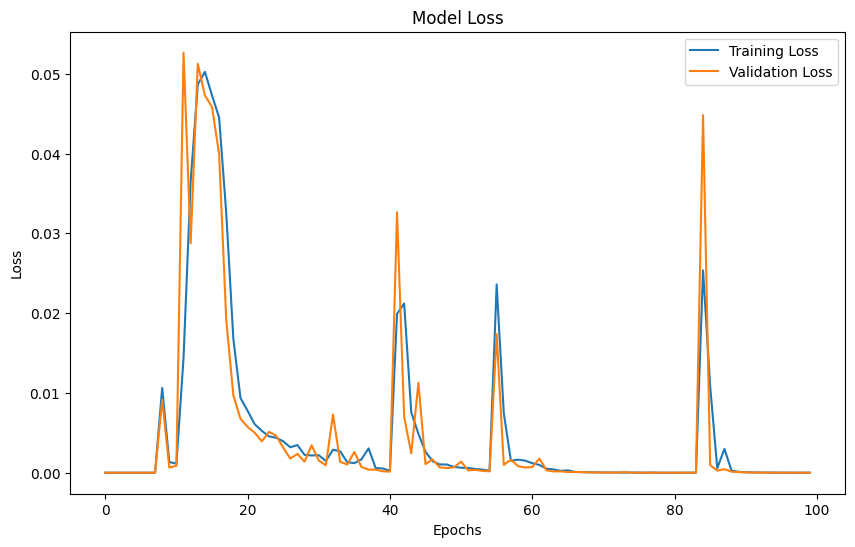

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


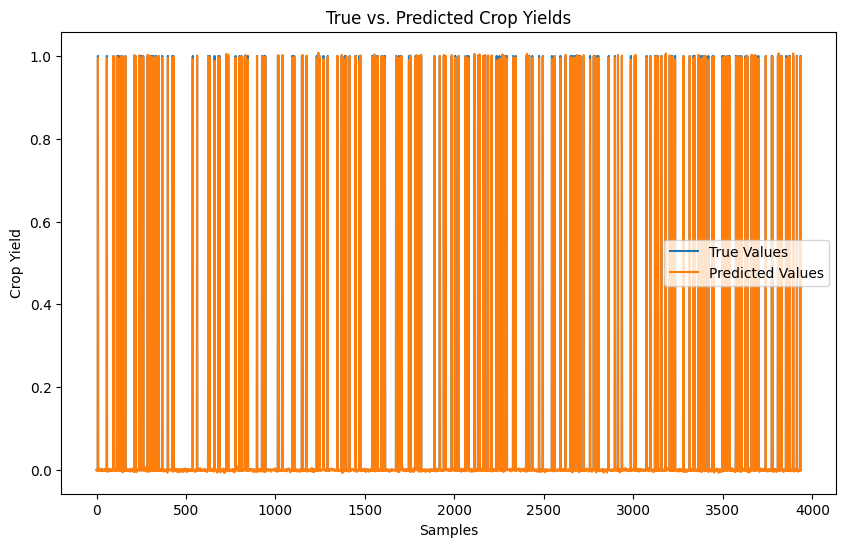

In [16]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs. Predicted Crop Yields')
plt.xlabel('Samples')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()


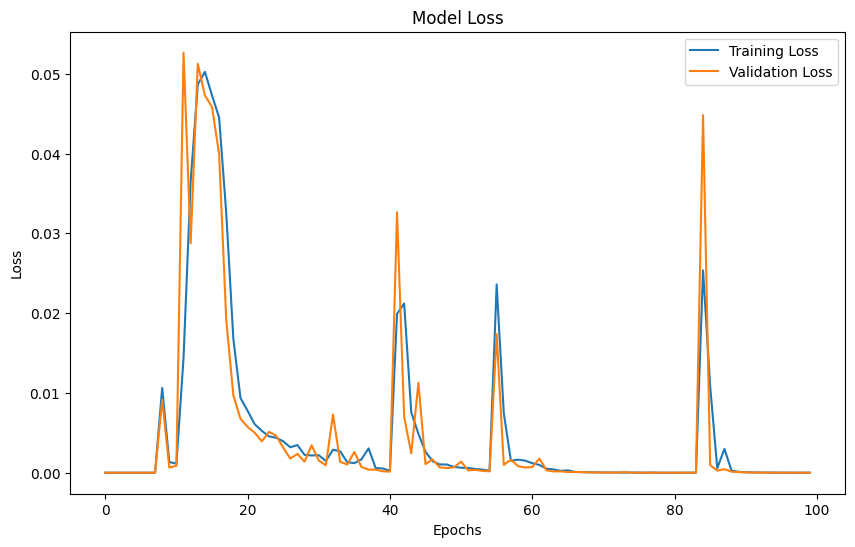

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


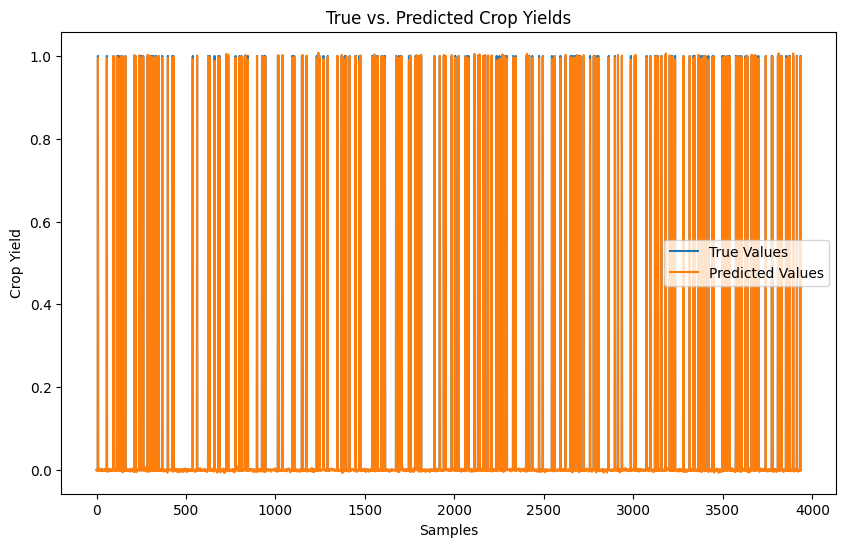

In [17]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Predictions vs. True Values
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs. Predicted Crop Yields')
plt.xlabel('Samples')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()


In [20]:
model.save('crop_yield_model.h5')
